### Temperature Sampling Demonstration
This notebook demonstrates how temperature affects the randomness of token selection in language models.

- Temperature = 0: Always select the highest probability token (deterministic)
- Temperature > 1: More random selection
- Temperature < 1: More focused on high probability tokens

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

# Set random seed for reproducibility
np.random.seed(42)

1. Create Sample Logits
First, let's create some example logits (pre-softmax values) for 10 tokens

In [2]:
# Create sample logits (pre-softmax scores)
tokens = ["token_" + str(i) for i in range(10)]
logits = np.array([5.0, 4.0, 3.0, 2.0, 1.0, 0.5, 0.3, 0.2, 0.1, 0.05])

2. Define Temperature Scaling Function

In [3]:
def apply_temperature(logits, temperature):
    """Apply temperature scaling to logits and return probabilities."""
    # Avoid division by zero
    temperature = max(temperature, 1e-8)

    # Scale logits by temperature
    scaled_logits = logits / temperature

    # Apply softmax to get probabilities
    probabilities = softmax(scaled_logits)

    return probabilities

3. Compare Different Temperatures

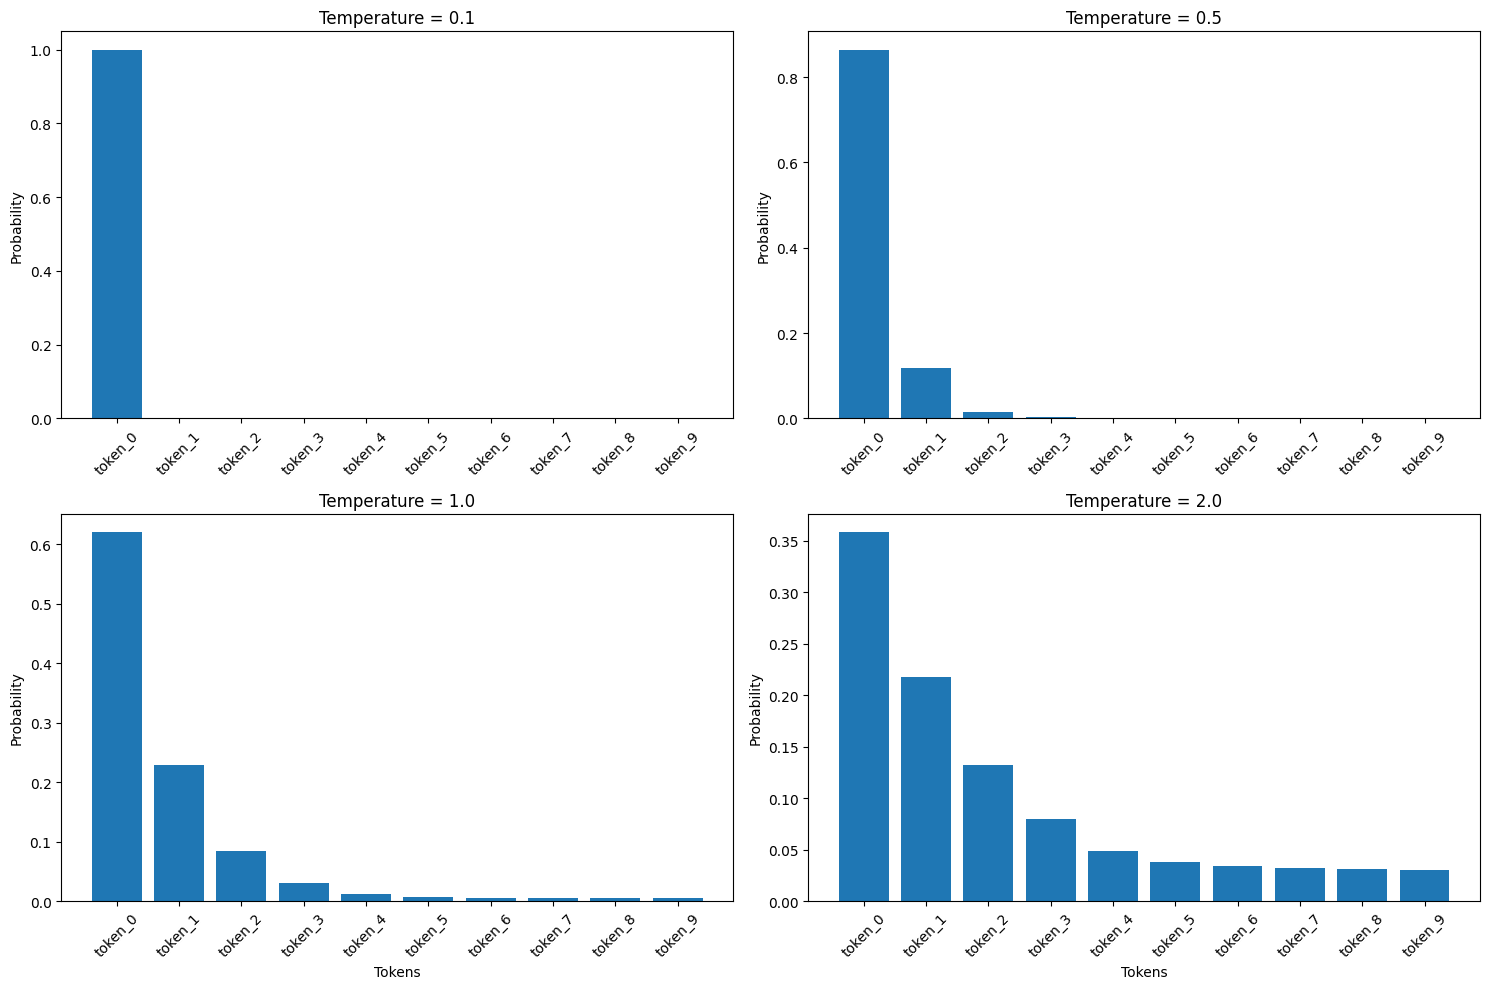

In [4]:
# Test different temperatures
temperatures = [0.1, 0.5, 1.0, 2.0]
plt.figure(figsize=(15, 10))

for i, temp in enumerate(temperatures, 1):
    probs = apply_temperature(logits, temp)

    plt.subplot(2, 2, i)
    plt.bar(tokens, probs)
    plt.title(f"Temperature = {temp}")
    plt.xticks(rotation=45)
    plt.ylabel("Probability")
    if i in [3, 4]:  # Only show x labels for bottom plots
        plt.xlabel("Tokens")

plt.tight_layout()
plt.show()

4. Demonstrate Token Sampling

In [5]:
def sample_tokens(probabilities, n_samples=10):
    """Sample tokens based on their probabilities."""
    return np.random.choice(tokens, size=n_samples, p=probabilities)


# Compare sampling results with different temperatures
print("Sampling 10 tokens with different temperatures:")
for temp in temperatures:
    probs = apply_temperature(logits, temp)
    samples = sample_tokens(probs)
    print(f"\nTemperature {temp}:")
    print(f"Samples: {samples}")
    # Count frequency of first token (highest probability)
    print(f"Frequency of token_0: {np.sum(samples == 'token_0')} out of 10")

Sampling 10 tokens with different temperatures:

Temperature 0.1:
Samples: ['token_0' 'token_0' 'token_0' 'token_0' 'token_0' 'token_0' 'token_0'
 'token_0' 'token_0' 'token_0']
Frequency of token_0: 10 out of 10

Temperature 0.5:
Samples: ['token_0' 'token_1' 'token_0' 'token_0' 'token_0' 'token_0' 'token_0'
 'token_0' 'token_0' 'token_0']
Frequency of token_0: 9 out of 10

Temperature 1.0:
Samples: ['token_0' 'token_0' 'token_0' 'token_0' 'token_0' 'token_1' 'token_0'
 'token_0' 'token_0' 'token_0']
Frequency of token_0: 9 out of 10

Temperature 2.0:
Samples: ['token_2' 'token_0' 'token_0' 'token_8' 'token_8' 'token_4' 'token_0'
 'token_0' 'token_2' 'token_1']
Frequency of token_0: 4 out of 10


This demonstrates why:
- Low temperatures are good for tasks requiring precise, deterministic output
- High temperatures are good for creative tasks requiring diversity
- Medium temperatures are often used as a good compromise